In [2]:
import pandas as pd

df=pd.read_csv('/content/finalset.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               22 non-null     object 
 1   Total_EVs           22 non-null     int64  
 2   Charging_Stations   22 non-null     int64  
 3   Per_Capita_Income   22 non-null     int64  
 4   Urbanization        22 non-null     float64
 5   Population_Density  22 non-null     int64  
 6   Bill                22 non-null     float64
 7   Ev_Policy           22 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 1.5+ KB


In [17]:
df.isnull().sum()

,0
State,0
Total_EVs,0
Charging_Stations,0
Per_Capita_Income,0
Urbanization,0
Population_Density,0
Bill,0
Ev_Policy,0


In [20]:
df['Ev_Policy']=df['Ev_Policy'].map({'Yes':1,'No':0})

In [22]:
df.head()

,State,Total_EVs,Charging_Stations,Per_Capita_Income,Urbanization,Population_Density,Bill,Ev_Policy
0,Andhra Pradesh,85000,327,180000,35.7,308,4.6,1
1,Assam,20000,86,80439,14.1,397,4.9,1
2,Bihar,112854,124,60337,11.3,1102,7.0,0
3,Chhattisgarh,15000,149,74489,24.7,189,7.0,1
4,Delhi,150000,1886,430120,97.5,11312,5.0,1


In [23]:
#slecting features for clustering
features = ['Total_EVs', 'Charging_Stations', 'Per_Capita_Income',
            'Urbanization', 'Population_Density', 'Bill', 'Ev_Policy']
X=df[features]

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [25]:
#standardise the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [36]:
#determine optimal number of clusters(elbow method)
inertia = []
s_scores=[]
k_range=range(2,10)
for k in (k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    s_scores.append(silhouette_score(X_scaled, labels))

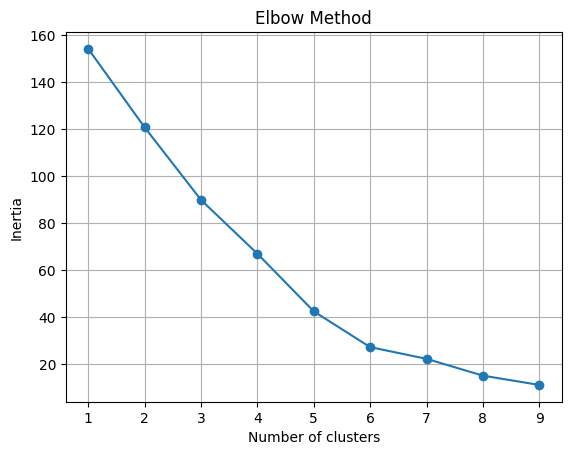

In [27]:
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

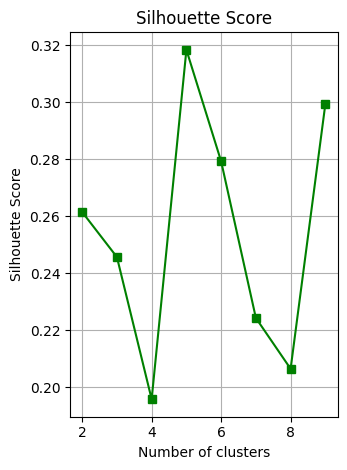

In [37]:
plt.subplot(1, 2, 2)
plt.plot(k_range, s_scores, marker='s', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
#fit kmeans with optimal clusters
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

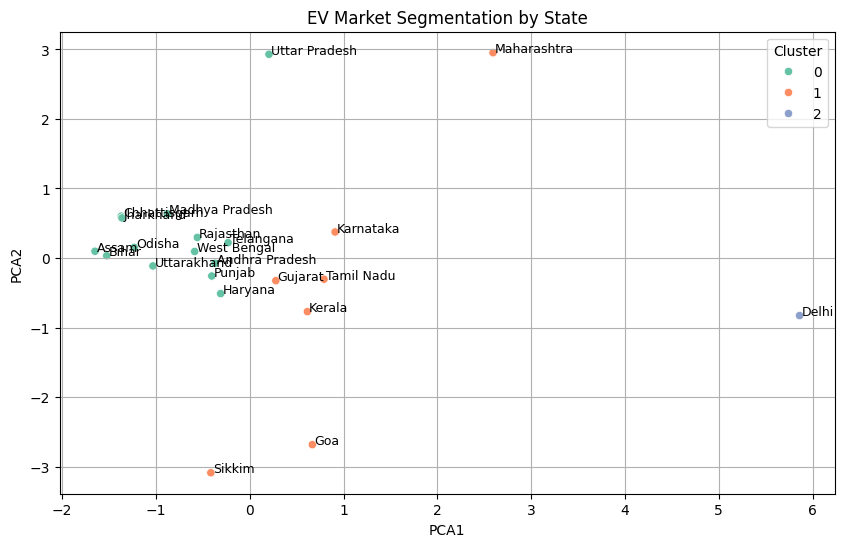

In [29]:
#visualisae clusters using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
for i in range(df.shape[0]):
    plt.text(df['PCA1'][i]+0.02, df['PCA2'][i], df['State'][i], fontsize=9)
plt.title('EV Market Segmentation by State')
plt.grid(True)
plt.show()

In [30]:
#Analyze Clusters
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary:")
print(cluster_summary)

best_cluster = cluster_summary['Total_EVs'].idxmax()
best_states = df[df['Cluster'] == best_cluster]['State']
print("\nBest Performing States for EV Market:")
print(best_states.tolist())


Cluster Summary:
         Total_EVs  Charging_Stations  Per_Capita_Income  Urbanization  \
Cluster                                                                  
0          72404.5         275.142857      142563.785714     26.721429   
1          99780.0         886.571429      369266.142857     44.114286   
2         150000.0        1886.000000      430120.000000     97.500000   

         Population_Density      Bill  Ev_Policy  
Cluster                                           
0                475.142857  5.928571   0.928571  
1                412.285714  5.685714   0.714286  
2              11312.000000  5.000000   1.000000  

Best Performing States for EV Market:
['Delhi']
